In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import dotenv
import numpy as np
import os

In [3]:
os.getcwd()

'C:\\Users\\dwagn\\git\\projects'

In [4]:
os.chdir('C:\\Users\\dwagn\\Desktop')
dotenv.load_dotenv()
CLIENT_ID = os.getenv('spotify-client-id')
CLIENT_SECRET = os.getenv('spotify-client-secret')
os.chdir('C:\\Users\\dwagn\\git\\projects')

In [5]:
AUTH_URL = 'https://accounts.spotify.com/api/token'


auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

if auth_response.status_code == 200:
    print ('Success!')
else:
    print ('API access rejected')

Success!


In [6]:
headers = {'Authorization': 'Bearer {}'.format(access_token)}

url = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '3mfJT8Ae3pME7OmluGNMYF'

r = requests.get(url + 'audio-features/' + track_id, headers=headers)

In [7]:
r = r.json()
r

{'danceability': 0.725,
 'energy': 0.385,
 'key': 6,
 'loudness': -14.283,
 'mode': 0,
 'speechiness': 0.0384,
 'acousticness': 0.471,
 'instrumentalness': 0,
 'liveness': 0.124,
 'valence': 0.809,
 'tempo': 125.138,
 'type': 'audio_features',
 'id': '3mfJT8Ae3pME7OmluGNMYF',
 'uri': 'spotify:track:3mfJT8Ae3pME7OmluGNMYF',
 'track_href': 'https://api.spotify.com/v1/tracks/3mfJT8Ae3pME7OmluGNMYF',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3mfJT8Ae3pME7OmluGNMYF',
 'duration_ms': 169867,
 'time_signature': 4}

In [8]:
# Paste artist's share link to get the artist_id
# 'https://open.spotify.com/artist/6py4uFIC7T6RdrZnH6hFYJ?si=EJXirCwjR-2y8iw8oBwYjQ'
artist_share_url = input('Paste artist spotify share link: ')
artist_id = artist_share_url.split('/')[4].split('?')[0]
print(artist_id)

KeyboardInterrupt: Interrupted by user

In [9]:
# artist_id = '6py4uFIC7T6RdrZnH6hFYJ' # Ballyhoo!
artist_id = '41Q0HrwWBtuUkJc7C1Rp6K' # 311

# pull albums
albums = requests.get(url + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50}).json()

In [10]:
album_names_dates = {}
for album in albums['items']:
    album_names_dates[album['name']] = album['release_date']

In [11]:
# albums['items'][0] # Pull artist name
artist_name = requests.get(url + 'artists/' + artist_id, headers=headers).json()['name']
artist_name

'311'

In [12]:
%%time
track_info = []
repeat_detection = []

for i in albums['items']:

    r = requests.get(url + 'albums/' + i['id'] + '/tracks', 
        headers=headers)
    tracks = r.json()['items']
    
    for track in tracks:
        detailsr = requests.get(url + 'audio-features/' + track['id'], headers=headers).json()
        
        # combine with album info
        detailsr.update({
            'track_name': track['name'],
            'album_name': i['name'],
            'album_id': i['id'],
            'release_date': i['release_date']
        })
        
        track_info.append(detailsr)
        
    print('{} added...'.format(i['name']))


Mardi Gras 2020 (Live) added...
Voyager (Instrumentals) added...
Voyager added...
Voyager added...
Voyager (Instrumentals) added...
MOSAIC added...
With the Unity Orchestra - Live from New Orleans - 311 Day 2014 added...
Stereolithic added...
Universal Pulse added...
Universal Pulse added...
Uplifter added...
Don't Tread On Me added...
Evolver added...
From Chaos added...
Soundsystem added...
Soundsystem added...
311 Live added...
Transistor added...
Transistor added...
311 added...
311 added...
Grassroots added...
Music added...
Wall time: 53.4 s


In [13]:
df = pd.DataFrame(track_info)
df.release_date = pd.to_datetime(df.release_date)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,album_id,release_date
0,0.343,0.806,1,-11.353,0,0.0936,0.000019,0.000049,0.4900,0.277,...,38znMaMurMhYmgYvMDQotf,spotify:track:38znMaMurMhYmgYvMDQotf,https://api.spotify.com/v1/tracks/38znMaMurMhY...,https://api.spotify.com/v1/audio-analysis/38zn...,248000,4,Beautiful Disaster - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
1,0.466,0.765,1,-11.978,1,0.1050,0.001130,0.000000,0.4420,0.456,...,6P7geqcpl7VcD3eFmKTAIR,spotify:track:6P7geqcpl7VcD3eFmKTAIR,https://api.spotify.com/v1/tracks/6P7geqcpl7Vc...,https://api.spotify.com/v1/audio-analysis/6P7g...,232750,4,All Mixed Up - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
2,0.544,0.881,1,-9.936,1,0.0782,0.013800,0.000130,0.4330,0.588,...,3T8PmznIDAnGTzd3PltUUP,spotify:track:3T8PmznIDAnGTzd3PltUUP,https://api.spotify.com/v1/tracks/3T8PmznIDAnG...,https://api.spotify.com/v1/audio-analysis/3T8P...,168084,4,Silver - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
3,0.432,0.857,7,-11.565,1,0.0676,0.000786,0.000077,0.3330,0.430,...,3V07MqrFuz5dJm6baCWz8m,spotify:track:3V07MqrFuz5dJm6baCWz8m,https://api.spotify.com/v1/tracks/3V07MqrFuz5d...,https://api.spotify.com/v1/audio-analysis/3V07...,228000,4,Come Original - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
4,0.575,0.854,7,-11.271,1,0.0515,0.003940,0.000045,0.2210,0.476,...,50qMMcQDAukXhh07xBKCh7,spotify:track:50qMMcQDAukXhh07xBKCh7,https://api.spotify.com/v1/tracks/50qMMcQDAukX...,https://api.spotify.com/v1/audio-analysis/50qM...,138500,4,Gap - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.580,0.822,8,-8.254,1,0.2280,0.020900,0.000089,0.0692,0.544,...,7HQg6v3KK4lhzlBcci0lvi,spotify:track:7HQg6v3KK4lhzlBcci0lvi,https://api.spotify.com/v1/tracks/7HQg6v3KK4lh...,https://api.spotify.com/v1/audio-analysis/7HQg...,248600,4,Nix Hex,Music,4MCopKPStHNf57HclK4Ds6,1993-02-09
306,0.801,0.909,2,-7.535,1,0.0935,0.001070,0.000542,0.0565,0.708,...,3ZXwToYkocg9mAeJW3bazC,spotify:track:3ZXwToYkocg9mAeJW3bazC,https://api.spotify.com/v1/tracks/3ZXwToYkocg9...,https://api.spotify.com/v1/audio-analysis/3ZXw...,177400,4,Plain,Music,4MCopKPStHNf57HclK4Ds6,1993-02-09
307,0.775,0.938,6,-6.640,0,0.0607,0.002160,0.000113,0.0391,0.674,...,0hMfJQJjAF71yHqbgKIpHY,spotify:track:0hMfJQJjAF71yHqbgKIpHY,https://api.spotify.com/v1/tracks/0hMfJQJjAF71...,https://api.spotify.com/v1/audio-analysis/0hMf...,202773,4,Feels So Good,Music,4MCopKPStHNf57HclK4Ds6,1993-02-09
308,0.622,0.968,9,-6.314,1,0.0956,0.000425,0.000519,0.1120,0.485,...,1JRxOhK2heeRsBsB2Dt4Vs,spotify:track:1JRxOhK2heeRsBsB2Dt4Vs,https://api.spotify.com/v1/tracks/1JRxOhK2heeR...,https://api.spotify.com/v1/audio-analysis/1JRx...,257827,4,Do You Right,Music,4MCopKPStHNf57HclK4Ds6,1993-02-09


In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])
# df = df.sort_values(by='release_date')

# sloppily move last couple columns to the front
cols = df.columns.tolist()
cols = cols[-4:] + cols[:-4]
df = df[cols]

In [15]:
# Shorten long album names
for name in df['album_name']:
    if len(name) > 25:
        short_name = name[0:25]
        df = df.replace(name, short_name)

In [16]:
# remove tracks with na values, if any
# can't simply dropna(), since there is an error column of NAs >:(

def removeErrors(dataframe):
    na_tracks = []
    for track in dataframe[~dataframe['error'].isna()]['track_name']: 
        na_tracks.append(track)
    print('Removing: ', na_tracks)
    dataframe = dataframe[dataframe['error'].isna()].drop('error', 1) 

if ('error' in df.columns): 
    removeErrors(df)

In [17]:
df['duration_mins'] = (df['duration_ms']/60000).round(2)

def toMinsSecs(time):
    minutes = int(time)
    seconds = int((time - minutes) * 60)
    if seconds < 10:
        seconds = str(seconds).zfill(2) # adds zeros before single seconds
    full = '{}:{}'.format(minutes, seconds)
    return full
df['duration_full'] = df['duration_mins'].map(lambda x: toMinsSecs(x))
df.head(5)

,track_name,album_name,album_id,release_date,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins,duration_full
0,Beautiful Disaster - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.343,0.806,1,-11.353,0,0.0936,...,169.943,audio_features,38znMaMurMhYmgYvMDQotf,spotify:track:38znMaMurMhYmgYvMDQotf,https://api.spotify.com/v1/tracks/38znMaMurMhY...,https://api.spotify.com/v1/audio-analysis/38zn...,248000,4,4.13,4:07
1,All Mixed Up - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.466,0.765,1,-11.978,1,0.1050,...,183.889,audio_features,6P7geqcpl7VcD3eFmKTAIR,spotify:track:6P7geqcpl7VcD3eFmKTAIR,https://api.spotify.com/v1/tracks/6P7geqcpl7Vc...,https://api.spotify.com/v1/audio-analysis/6P7g...,232750,4,3.88,3:52
2,Silver - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.544,0.881,1,-9.936,1,0.0782,...,96.965,audio_features,3T8PmznIDAnGTzd3PltUUP,spotify:track:3T8PmznIDAnGTzd3PltUUP,https://api.spotify.com/v1/tracks/3T8PmznIDAnG...,https://api.spotify.com/v1/audio-analysis/3T8P...,168084,4,2.80,2:47
3,Come Original - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.432,0.857,7,-11.565,1,0.0676,...,187.884,audio_features,3V07MqrFuz5dJm6baCWz8m,spotify:track:3V07MqrFuz5dJm6baCWz8m,https://api.spotify.com/v1/tracks/3V07MqrFuz5d...,https://api.spotify.com/v1/audio-analysis/3V07...,228000,4,3.80,3:47
4,Gap - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.575,0.854,7,-11.271,1,0.0515,...,106.998,audio_features,50qMMcQDAukXhh07xBKCh7,spotify:track:50qMMcQDAukXhh07xBKCh7,https://api.spotify.com/v1/tracks/50qMMcQDAukX...,https://api.spotify.com/v1/audio-analysis/50qM...,138500,4,2.31,2:18


In [18]:
# subset by album
by_album = df.groupby('album_name').agg({'danceability':'mean',
                                         'energy':'mean',
                                         'loudness':'mean',
                                         'speechiness':'mean',
                                         'acousticness':'mean',
                                         'instrumentalness':'mean',
                                         'liveness':'mean',
                                         'valence':'mean',
                                         'tempo':'mean',
                                         'time_signature':'mean',
                                         'duration_ms':'sum',
                                         'duration_mins':'sum'}).round(3).reset_index()
by_album

,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_mins
0,311,0.628,0.787,-7.211,0.056,0.011,0.000,0.256,0.656,115.734,4.000,4757158,79.29
1,311 Live,0.440,0.907,-6.271,0.124,0.040,0.008,0.925,0.311,130.326,3.929,3367134,56.12
2,Don't Tread On Me,0.593,0.838,-6.199,0.059,0.004,0.000,0.154,0.654,153.986,4.000,2246653,37.44
3,Evolver,0.593,0.712,-9.363,0.056,0.089,0.080,0.150,0.565,135.011,4.000,2474947,41.26
4,From Chaos,0.577,0.837,-6.480,0.068,0.045,0.002,0.089,0.627,150.110,4.000,2396479,39.95
5,Grassroots,0.628,0.790,-8.663,0.113,0.030,0.002,0.186,0.681,123.388,4.000,2711386,45.20
6,MOSAIC,0.548,0.878,-6.781,0.086,0.054,0.000,0.228,0.598,145.011,4.000,3641238,60.69
7,Mardi Gras 2020 (Live),0.445,0.751,-11.090,0.063,0.005,0.103,0.382,0.329,138.343,4.000,4606209,76.78
8,Music,0.665,0.888,-7.125,0.112,0.003,0.001,0.115,0.611,126.446,3.917,2777402,46.31
9,Soundsystem,0.629,0.878,-6.009,0.063,0.037,0.011,0.149,0.681,124.392,4.000,5607972,93.48


In [19]:
# remove extra/repeated albums
# for repeat albums, go through and pick shortest album

albs_to_keep = {}
for name in by_album['album_name']:
    trim_name = name.split('(')[0].strip()
    alb_len = len(df[df['album_name'] == '{}'.format(name)])
    print(trim_name,':',alb_len)
#     if trim_name.upper() in albs_to_keep and :
        # compare with one in detector. If longer, then swap
    for i in albs_to_keep.keys():
        if (name[0:5] in i) & (alb_len <= albs_to_keep[i]):
            albs_to_keep[i] = 0
    albs_to_keep[name] = alb_len
albs_to_keep = {x:y for x,y in albs_to_keep.items() if y != 0}

by_album = by_album[by_album['album_name'].isin(albs_to_keep)].reset_index(drop=True)

311 : 28
311 Live : 14
Don't Tread On Me : 11
Evolver : 12
From Chaos : 12
Grassroots : 14
MOSAIC : 17
Mardi Gras 2020 : 20
Music : 12
Soundsystem : 26
Stereolithic : 15
Transistor : 40
Universal Pulse : 16
Uplifter : 12
Voyager : 26
Voyager : 26
With the Unity Orchestra : 9


[Text(0, 0, 'With the Unity Orchestra '),
 Text(1, 0, "Don't Tread On Me"),
 Text(2, 0, 'From Chaos'),
 Text(3, 0, 'Evolver'),
 Text(4, 0, 'Grassroots'),
 Text(5, 0, 'Music'),
 Text(6, 0, 'Uplifter'),
 Text(7, 0, 'Stereolithic'),
 Text(8, 0, '311 Live'),
 Text(9, 0, 'Universal Pulse'),
 Text(10, 0, 'MOSAIC'),
 Text(11, 0, 'Mardi Gras 2020 (Live)'),
 Text(12, 0, '311'),
 Text(13, 0, 'Voyager (Instrumentals)'),
 Text(14, 0, 'Soundsystem'),
 Text(15, 0, 'Transistor')]

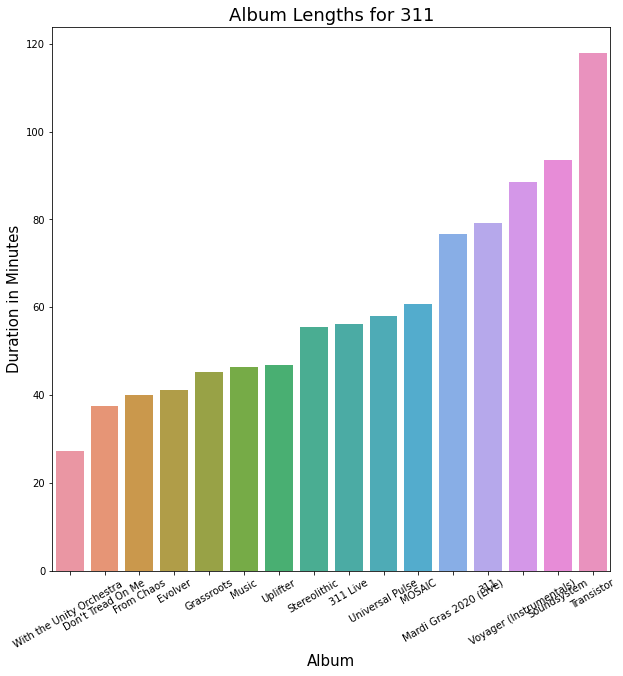

In [20]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=by_album, 
                 x='album_name', 
                 y='duration_mins',
                order = by_album.sort_values('duration_mins').album_name)
plt.xlabel("Album", size=15)
plt.ylabel("Duration in Minutes", size=15)
plt.title("Album Lengths for {artist}".format(artist = artist_name), size=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

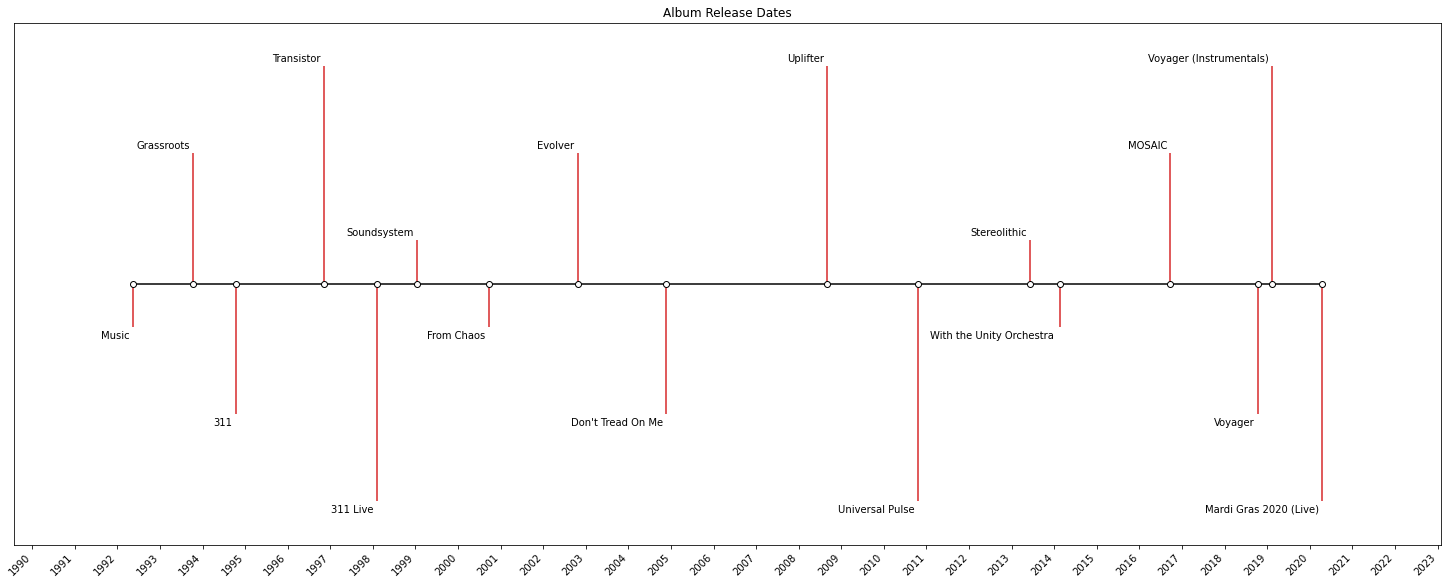

In [ ]:
dates = df.release_date.unique()
names = df.album_name.unique()
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)
ax.set(title='Album Release Dates')
ax.vlines(dates, 0, levels, color='tab:red')
ax.plot(dates, np.zeros_like(dates), '-o',
        color='k', markerfacecolor='w')

for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")
    
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12)) # by year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right"); # semicolon stopping label output

ax.margins(y=0.1, x=0.1)
ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
corr_mat = by_album.corr(method='pearson').round(2)
sorted_mat = corr_mat.unstack().sort_values() \
             [:-(len(by_album.columns))-1] \
             [::2]
sorted_mat = sorted_mat.sort_values(ascending=False)
top_5_corr = sorted_mat.head(5)
bottom_5_corr = sorted_mat.tail(5)
print('Top 5 positive correlations:\n{}\n\nTop 5 negative correlations:\n{}' \
      .format(top_5_corr, bottom_5_corr))

Top 5 positive correlations:
valence       danceability      0.85
loudness      energy            0.84
acousticness  time_signature    0.69
speechiness   energy            0.55
loudness      valence           0.51
dtype: float64

Top 5 negative correlations:
instrumentalness  loudness         -0.64
energy            time_signature   -0.64
speechiness       time_signature   -0.68
liveness          danceability     -0.76
                  valence          -0.82
dtype: float64


In [75]:
top_5_corr[0:1]

valence  danceability    0.85
dtype: float64

In [78]:
# messy attributes

def graphTopCorrs(signum, idx11, idx12, idx21, idx22, pallette='Set1'):
    var1 = str(signum[idx11:idx12]).split()[0]
    var2 = str(signum[idx21:idx22]).split()[1]
    
    plt.figure(figsize=(10, 10))
    plt.title("{var1} vs. {var2} for {artist} (by album)".format(var1 = var1,
                                                      var2 = var2,
                                                      artist = artist_name), size=18)
    plt.tight_layout()
    ax = sns.scatterplot(data=by_album, 
                     x=var1, 
                     y=var2,
                     s=1000,
                     marker='o',
                     hue='album_name',
                     palette=pallette)
    sns.set_style("ticks")
    plt.xlabel(var1, size=15)
    plt.ylabel(var2, size=15)

    ax.legend(h[1:len(album_names_dates)+1], 
              labs[1:int(len(album_names_dates))+1], loc='best', title='Albums')


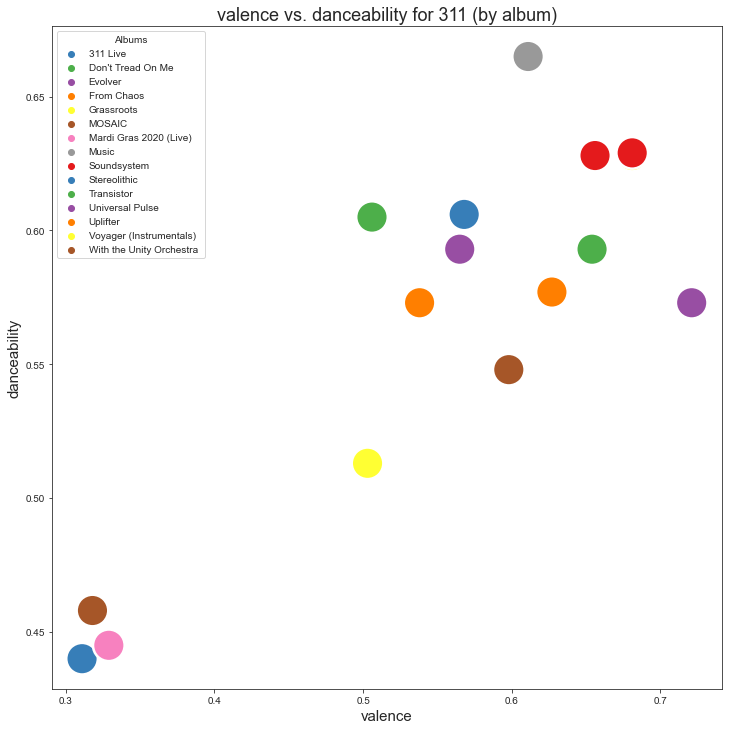

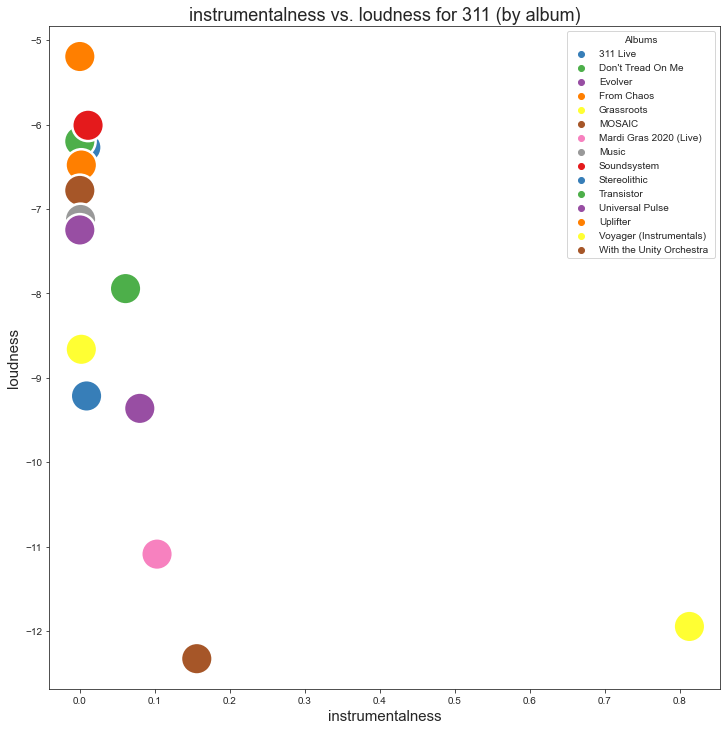

In [77]:
graphTopCorrs(top_5_corr, 0,1,0,1)
graphTopCorrs(bottom_5_corr, 0,1,0,1)

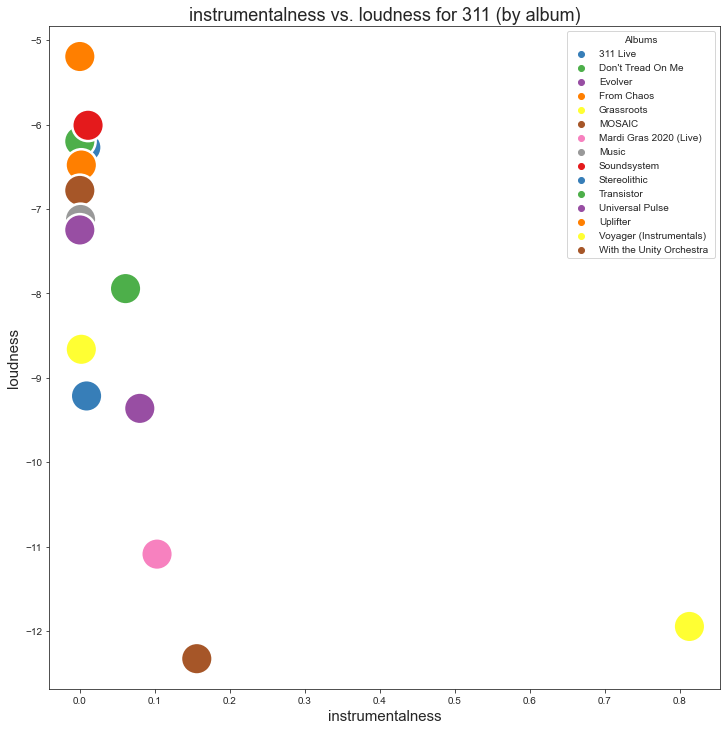

In [49]:
# The largest negative correlation for this artist
var1 = str(bottom_5_corr[0:1]).split()[0]
var2 = str(bottom_5_corr[0:1]).split()[1]

plt.figure(figsize=(10, 10))
plt.title("{var1} vs. {var2} for {artist} (by album)".format(var1 = var1,
                                                  var2 = var2,
                                                  artist = artist_name), size=18)
plt.tight_layout()
ax = sns.scatterplot(data=by_album, 
                 x=var1, 
                 y=var2,
                 s=1000,
                 marker='o',
                 hue='album_name',
                 palette='Set1')
sns.set_style("ticks")
plt.xlabel(var1, size=15)
plt.ylabel(var2, size=15)

h,labs = ax.get_legend_handles_labels()

ax.legend(h[1:len(album_names_dates)+1], 
          labs[1:int(len(album_names_dates))+1], loc='best', title='Albums')

C:\Users\dwagn\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


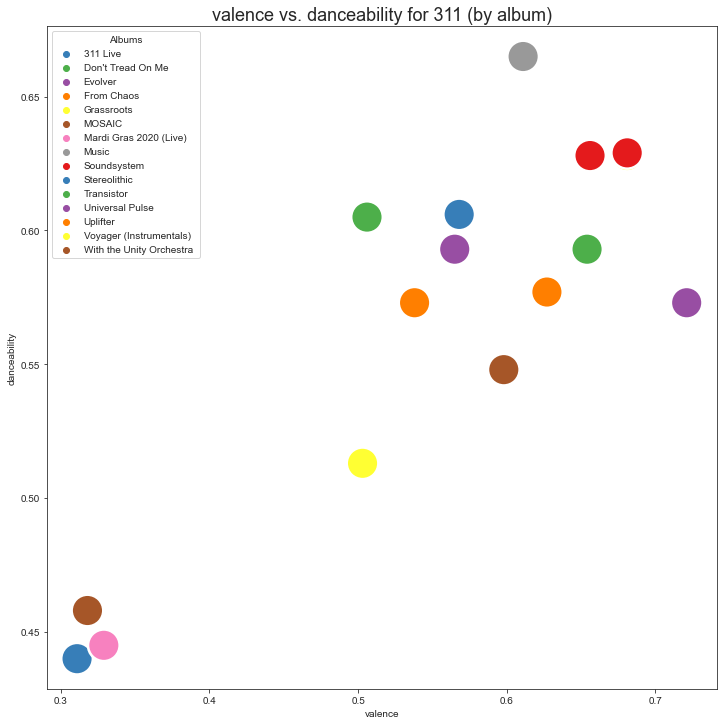

In [48]:
# The largest positive correlation for this artist

# import warnings
warnings.filterwarnings("ignore")

var1 = str(top_5_corr[0:1]).split()[0]
var2 = str(top_5_corr[0:1]).split()[1]

plt.figure(figsize=(10, 10))
plt.title("{var1} vs. {var2} for {artist} (by album)".format(var1 = var1,
                                                  var2 = var2,
                                                  artist = artist_name), size=18)
plt.tight_layout()
ax = sns.scatterplot(data=by_album, 
                 x=var1, 
                 y=var2,
                 s=1000,
                 hue='album_name',
                 palette='Set1')
h,labs = ax.get_legend_handles_labels()


ax.legend(h[1:len(album_names_dates)+1], 
          labs[1:int(len(album_names_dates))+1], loc='best', title='Albums')

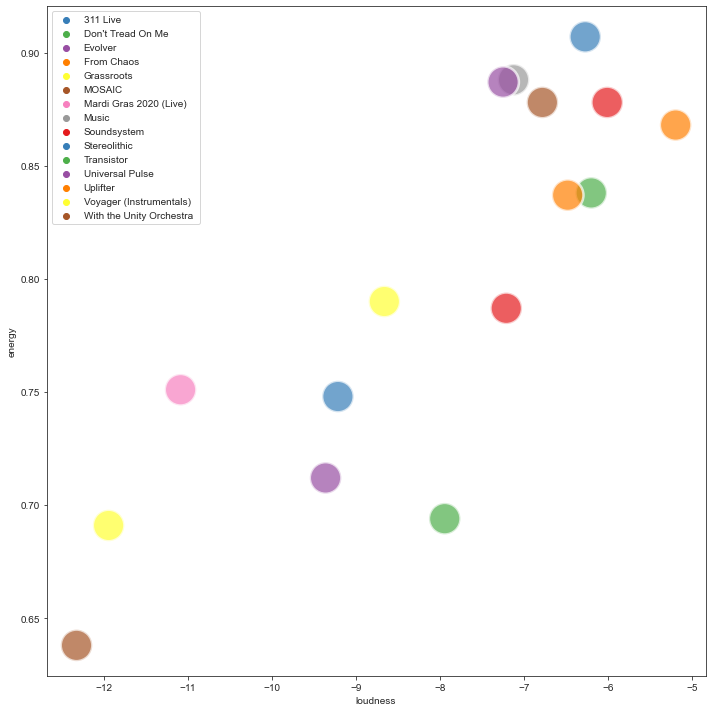

In [38]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=by_album, 
                     x='loudness', y='energy', 
                     hue='album_name', 
                     palette='Set1', 
#                      size='duration_ms',
                     s=1000,
                     sizes=(50,1000), 
                     alpha=0.7)
# plt.xlabel("Average Song Energy", size=15)
# plt.ylabel("Average Song Tempo", size=15)
# plt.title("Album Energy and Tempo for {artist}".format(artist = 'None'), size=18)
plt.tight_layout()
# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:len(album_names_dates)+1], 
          labs[1:int(len(album_names_dates))+1], loc='best', title=None)